In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Загрузка данных

In [2]:
import pandas as pd

data_BF = pd.read_csv('BlackFriday-Copy1.csv', sep=',', encoding='latin1')
data_BF.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data_BF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Заметим, что ряд атрибутов имеют тип object. Кроме того атрибуты Product_Catagory_1 и Product_Catagory_2 имеют нулевые значения. 
С помощью метода value_counts() какие категории существуют у категориальных атрибутов и сколько киентов  им принадлежат.

In [4]:
data_BF["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [5]:
data_BF["Age"].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [6]:
data_BF["Occupation"].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [7]:
data_BF["City_Category"].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [8]:
data_BF["Stay_In_Current_City_Years"].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

In [9]:
data_BF["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

Метод describe() отображает сводку по числовым  атрибутам.

In [10]:
data_BF_without_ID=data_BF.drop(["User_ID",  "Marital_Status"] , axis=1)


In [11]:
data_BF_without_ID.describe()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,5.295546,9.842144,12.669840,9333.859853
std,6.52412,3.750701,5.087259,4.124341,4981.022133
min,0.00000,1.000000,2.000000,3.000000,185.000000
25%,2.00000,1.000000,5.000000,9.000000,5866.000000
50%,7.00000,5.000000,9.000000,14.000000,8062.000000
75%,14.00000,8.000000,15.000000,16.000000,12073.000000
max,20.00000,18.000000,18.000000,18.000000,23961.000000


Постоим гистограммы числовых атрибутов.

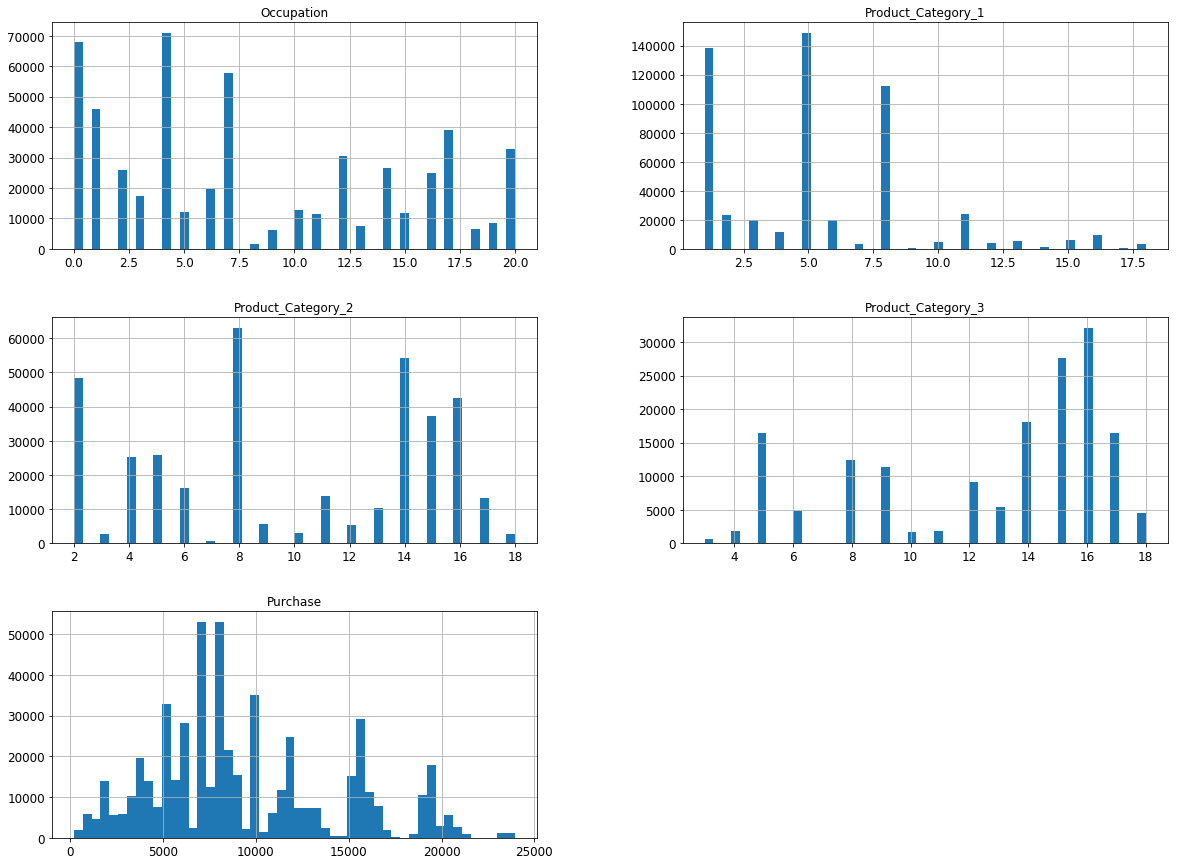

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
data_BF_without_ID.hist(bins=50, figsize=(20,15))

plt.show()

# Создание испытательного набора

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_BF, test_size=0.2, random_state=42)

In [14]:
print(len(train_set), "train +", len(test_set), "test")

430061 train + 107516 test


In [15]:
train_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
80541,1000411,P00117442,F,46-50,1,B,0,1,5,14.0,NaN,8757
469742,1000352,P00136142,M,18-25,4,A,0,0,6,16.0,NaN,8644
477144,1001474,P00029242,M,26-35,4,A,2,1,8,NaN,NaN,6129
139704,1003589,P00113142,F,46-50,0,B,1,1,1,5.0,12.0,11585
52739,1002025,P00145642,M,55+,13,C,3,0,1,8.0,17.0,15273


Предположим, что атрибут Age является важным атрибутом для прогнозирования Purchase. Постороим стратифицированную выборку на основе категории возраста 

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_BF, data_BF["Age"]):
    strat_train_set = data_BF.loc[train_index]
    strat_test_set = data_BF.loc[test_index]

In [17]:
strat_test_set["Age"].value_counts() / len(strat_test_set)

26-35    0.399364
36-45    0.199970
18-25    0.181619
46-50    0.082825
51-55    0.069980
55+      0.038887
0-17     0.027354
Name: Age, dtype: float64

In [18]:
data_BF["Age"].value_counts() / len(data_BF)

26-35    0.399366
36-45    0.199969
18-25    0.181619
46-50    0.082827
51-55    0.069977
55+      0.038884
0-17     0.027358
Name: Age, dtype: float64

In [19]:
def age_proportions(data):
    return data["Age"].value_counts() / len(data)

train_set, test_set = train_test_split(data_BF, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": age_proportions(data_BF),
    "Stratified": age_proportions(strat_test_set),
    "Random": age_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [20]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
0-17,0.027358,0.027540,0.027354,0.665788,-0.014157
18-25,0.181619,0.183117,0.181619,0.824969,0.000466
26-35,0.399366,0.399847,0.399364,0.120546,-0.000558
36-45,0.199969,0.200212,0.199970,0.121303,0.000372
46-50,0.082827,0.081969,0.082825,-1.035902,-0.002804
51-55,0.069977,0.069255,0.069980,-1.031973,0.004759
55+,0.038884,0.038059,0.038887,-2.119859,0.009010


Сравнивая пропорции возраста в полном объеме данных, в испытательном наборе, который сгенерирован посредством стратифицированной выборки, и в испытательном наборе, полученном  с применением случайной выборки, имеем, что испытательный набор, полученный с помощью стратифицированной выборки имеет пропорции, идентичные проциям полного набора данных.

Создадим копию обучающего набора.

In [21]:
BF = strat_train_set.copy()

# Очистка данных

Создадим функцию для подготовки данных. Т.к. атрибуты "Product_Category_2", "Product_Category_3" имееют значения NaN, необхидимо провести очистку данных. Существует три варианта:
1. Удалить строки, содержащие NaN;
2. Удалить атрибуты, содержащие NaN;
3. Заменить NaN мат. ожиданием этого атрибута (Imputer)

In [22]:
from sklearn.preprocessing import Imputer


def prepare (X, drop_col = False, drop_row = False, imputer1 = True):
    
    if drop_col:
        BF_col = X.dropna(subset=["Product_Category_2", "Product_Category_3"])
        return BF_col
    elif drop_row:
        BF_row = X.drop(["Product_Category_2", "Product_Category_3"], axis=1)
        return BF_row
    else:
        imputer = Imputer (strategy = 'median')
        imputer.fit(X)
        Y = imputer.transform(X)
        BF_imput = pd.DataFrame(Y, columns=X.columns, index = list(BF.index.values))
        return BF_imput  
 

Т.к. данных достаточно много, попробуем вариант с удалением соответвсующих строк.

In [23]:
BF_prep = prepare(BF, drop_col = True, drop_row = False, imputer1 = False)
BF_prep.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
134097,1002701,P00037142,M,46-50,1,A,3,1,1,2.0,5.0,7585
114745,1005711,P00296042,M,26-35,7,C,4+,0,8,13.0,16.0,3998
172040,1002600,P00015642,M,26-35,14,C,1,1,8,16.0,17.0,7964
68335,1004449,P00046742,M,26-35,12,C,4+,1,1,2.0,15.0,15334
233837,1000025,P00066242,M,18-25,4,C,4+,0,1,2.0,5.0,15773


In [24]:
BF_data = BF_prep.drop("Purchase", axis=1)
BF_labels = BF_prep["Purchase"].copy()

In [25]:

from sklearn.preprocessing import FunctionTransformer
from future_encoders import OneHotEncoder

def coder_cat (X,  one_hot_cat=True, share_cat = False):
    BF_cat_Use = X["User_ID"]
    BF_cat_Prod = X["Product_ID"]
    BF_cat_Gen = X["Gender"]
    BF_cat_Age = X["Age"]
    BF_cat_CC = X["City_Category"]
    BF_cat_SCCY = X["Stay_In_Current_City_Years"]
    BF_cat_MS = X["Marital_Status"]
    BF_cat_Prod1 = X["Product_Category_1"]
    BF_cat_Prod2 = X["Product_Category_2"]
    BF_cat_Prod3 = X["Product_Category_3"]
    
    encoder = OneHotEncoder(sparse=False)
        
    BF_cat_Use_encoded, BF_categories_Use = BF_cat_Use.factorize()
    BF_cat_Prod_encoded, BF_categories_Prod = BF_cat_Prod.factorize()
    BF_cat_Gen_encoded, BF_categories_Gen = BF_cat_Gen.factorize()
    BF_cat_Age_encoded, BF_categories_Age = BF_cat_Age.factorize()
    BF_cat_CC_encoded, BF_categories_CC = BF_cat_CC.factorize()
    BF_cat_SCCY_encoded, BF_categories_SCCY = BF_cat_SCCY.factorize()
    BF_cat_MS_encoded, BF_categories_MS = BF_cat_MS.factorize() 
    BF_cat_Prod1_encoded, BF_categories_Prod1 = BF_cat_Prod1.factorize()
    BF_cat_Prod2_encoded, BF_categories_Prod2 = BF_cat_Prod2.factorize()
    BF_cat_Prod3_encoded, BF_categories_Prod3 = BF_cat_Prod3.factorize()


   
    if one_hot_cat:
        BF_cat_Use_1hot = encoder.fit_transform(BF_cat_Use_encoded.reshape(-1,1))
        BF_cat_Prod_1hot = encoder.fit_transform(BF_cat_Prod_encoded.reshape(-1,1))
        BF_cat_Gen_1hot = encoder.fit_transform(BF_cat_Gen_encoded.reshape(-1,1))
        BF_cat_Gen_1hot = encoder.fit_transform(BF_cat_Gen_encoded.reshape(-1,1))
        BF_cat_Age_1hot = encoder.fit_transform(BF_cat_Age_encoded.reshape(-1,1))
        BF_cat_CC_1hot = encoder.fit_transform(BF_cat_CC_encoded.reshape(-1,1))
        BF_cat_SCCY_1hot = encoder.fit_transform(BF_cat_SCCY_encoded.reshape(-1,1))
        BF_cat_MS_1hot = encoder.fit_transform(BF_cat_MS_encoded.reshape(-1,1))
        BF_cat_Prod1_1hot = encoder.fit_transform(BF_cat_Prod1_encoded.reshape(-1,1))
        BF_cat_Prod2_1hot = encoder.fit_transform(BF_cat_Prod2_encoded.reshape(-1,1))
        BF_cat_Prod3_1hot = encoder.fit_transform(BF_cat_Prod3_encoded.reshape(-1,1))
        
        return np.c_[BF_cat_Use_1hot, BF_cat_Prod_1hot, BF_cat_Gen_1hot, BF_cat_Age_1hot, BF_cat_CC_1hot, BF_cat_SCCY_1hot,
                     BF_cat_MS_1hot, BF_cat_Prod1_1hot, BF_cat_Prod2_1hot, BF_cat_Prod3_1hot]
    else:
        X["BF_cat_Use_cod"] = X["User_ID"].map(X.groupby("User_ID").size())
        X["BF_cat_Prod_cod"] = X["Product_ID"].map(X.groupby("Product_ID").size())
        X["BF_cat_Gen_cod"] = X["Gender"].map(X.groupby("Gender").size())
        X["BF_cat_Age_cod"] = X["Age"].map(X.groupby("Age").size())
        X["BF_cat_CC_cod"] = X["City_Category"].map(X.groupby(X["City_Category"]).size())
        X["BF_cat_SCCY_cod"] = X["Stay_In_Current_City_Years"].map(X.groupby(X["Stay_In_Current_City_Years"]).size())
        X["BF_cat_MS_cod"] = X["Marital_Status"].map(X.groupby(X["Marital_Status"]).size())
        X["BF_cat_Prod1_cod"] = X["Product_Category_1"].map(X.groupby(X["Product_Category_1"]).size())
        X["BF_cat_Prod2_cod"] = X["Product_Category_2"].map(X.groupby(X["Product_Category_2"]).size())
        X["BF_cat_Prod3_cod"] = X["Product_Category_3"].map(X.groupby(X["Product_Category_3"]).size())
        
        return np.c_[X["BF_cat_Use_cod"], X["BF_cat_Prod_cod"], X["BF_cat_Gen_cod"], X["BF_cat_Age_cod"], X["BF_cat_CC_cod"],
                     X["BF_cat_SCCY_cod"], X["BF_cat_MS_cod"], X["BF_cat_Prod1_cod"], X["BF_cat_Prod2_cod"], X["BF_cat_Prod3_cod"] ]

#attr_coder = FunctionTransformer(coder_cat, validate=False,
                                 #kw_args={"one_hot_cat": False, "share_cat": True})
#BF_coder = attr_coder.fit_transform(BF_prep)
#BF_coder.shape

Применим pipeline для категориальных данных

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

cat_pipeline = Pipeline([
    ('coder',  FunctionTransformer(coder_cat, validate=False, kw_args={"one_hot_cat": False, "share_cat": True})),
    ('std_scaler', StandardScaler())
])

In [27]:
BF_prepared = cat_pipeline.fit_transform(BF_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
BF_prepared

array([[-0.6415357 ,  0.35457624,  0.53822887, ...,  0.90657471,
         1.48603752, -0.28233173],
       [-1.22388627,  0.29726541,  0.53822887, ..., -1.19027475,
        -1.22887199,  1.40203722],
       [-1.28212132, -0.53055776,  0.53822887, ..., -1.19027475,
        -1.61398056, -0.26619818],
       ...,
       [ 0.17375509, -1.34246126,  0.53822887, ..., -1.00575252,
        -0.26099096, -0.28233173],
       [-0.8453584 ,  0.31636902,  0.53822887, ...,  0.90657471,
        -0.52549417, -0.68818305],
       [-0.05918514, -0.29813049,  0.53822887, ...,  0.90657471,
        -1.26035828,  0.913799  ]])

In [29]:
BF_prepared.shape

(131600, 10)

# Обучение модели

Обучим модель линейной регрессией

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(BF_prepared, BF_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Опробуем полученную модель на нескольких образцах  из обучаещего набора:

In [31]:
some_data = BF_data.iloc[:5]
some_labels = BF_labels.iloc[:5]
some_data_prepared = cat_pipeline.fit_transform(some_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [32]:
print("Прогнозы:", lin_reg.predict(some_data_prepared))

Прогнозы: [13203.13178225  9321.16754566  9208.74754784 13191.37016169
 13394.29181514]


In [33]:
print("Метки:", list(some_labels))

Метки: [7585, 3998, 7964, 15334, 15773]


Модель работает, но предсказания достаточно неточные. Вычисли ошибку RMSE этой модели на целом обучаещем наборе

In [34]:
from sklearn.metrics import mean_squared_error

BF_predictions = lin_reg.predict(BF_prepared)
lin_mse = mean_squared_error(BF_labels, BF_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4353.762142567611

Обучим модель DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(BF_prepared, BF_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [36]:
BF_predictions = tree_reg.predict(BF_prepared)
tree_mse = mean_squared_error(BF_labels, BF_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

467.1091778961831

Обучим модель RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(BF_prepared, BF_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
BF_predictions = forest_reg.predict(BF_prepared)
forest_mse = mean_squared_error(BF_labels, BF_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1520.5216485845901

Обучим модель SVR

In [39]:
#from sklearn.svm import SVR
#svr_reg = SVR()
#svr_reg.fit(BF_prepared, BF_labels)

In [40]:
#BF_predictions = svr_reg.predict(BF_prepared)
#svr_mse = mean_squared_error(BF_labels, BF_predictions)
#svr_rmse = np.sqrt(svr_mse)
#svr_rmse

# Оценка с использованием перекстной проверки(k-fold cross-validation)

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, BF_prepared, BF_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, BF_prepared, BF_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, BF_prepared, BF_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [45]:
display_scores(tree_rmse_scores)

Scores: [4597.98094366 4637.62162071 4613.5636918  4575.10243327 4514.75245478
 4574.65739502 4625.73071047 4596.46963504 4593.71524859 4569.08157597]
Mean: 4589.867570932882
Standard deviation: 32.826872962566696


In [46]:
display_scores(lin_rmse_scores)

Scores: [4376.83212378 4382.91671277 4358.10397095 4382.82586491 4328.24737927
 4332.98884652 4371.50770279 4366.09098259 4322.94031543 4318.54824859]
Mean: 4354.100214759708
Standard deviation: 24.462344602326


In [47]:
display_scores(forest_rmse_scores)

Scores: [3556.22728719 3529.63865291 3553.60207021 3542.28330616 3523.79093195
 3505.80346776 3546.82985803 3503.86448175 3525.47408839 3513.21095482]
Mean: 3530.0725099165043
Standard deviation: 18.134431240177673


Полученные результаты позволяют сделать вывод о том, что из приведенных моделей, лучшей является RandomForestRegressor

# Точная настройка модели

Оценим все возможные комбинации гиперпараметров для использованных моделей с помощью GridSearchCV. Первой проработаем модель, показувшую лучшие результаты.

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [50, 60, 70, 80], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(BF_prepared, BF_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 60, 70, 80], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [49]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 80}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3378.745798277235 {'max_features': 2, 'n_estimators': 50}
3373.0904530196435 {'max_features': 2, 'n_estimators': 60}
3369.408871044574 {'max_features': 2, 'n_estimators': 70}
3365.794636061621 {'max_features': 2, 'n_estimators': 80}
3378.1317654470186 {'max_features': 4, 'n_estimators': 50}
3374.542475530636 {'max_features': 4, 'n_estimators': 60}
3370.4280977796548 {'max_features': 4, 'n_estimators': 70}
3367.437114192795 {'max_features': 4, 'n_estimators': 80}
3391.7377805582637 {'max_features': 6, 'n_estimators': 50}
3385.6955709331605 {'max_features': 6, 'n_estimators': 60}
3382.375820492561 {'max_features': 6, 'n_estimators': 70}
3380.751207307257 {'max_features': 6, 'n_estimators': 80}
3401.629677960969 {'max_features': 8, 'n_estimators': 50}
3397.551866767319 {'max_features': 8, 'n_estimators': 60}
3394.4142458095916 {'max_features': 8, 'n_estimators': 70}
3391.0909643359037 {'max_features': 8, 'n_estimators': 80}
3906.378467247047 {'bootstrap': False, 'max_features': 2, 'n_esti

In [52]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,10.158981,0.677041,-1.141592e+07,-1.756337e+06,NaN,2,50,"{'max_features': 2, 'n_estimators': 50}",8,-1.149205e+07,...,-1.134404e+07,-1.763064e+06,-1.145821e+07,-1.754982e+06,-1.126661e+07,-1.759139e+06,0.083770,0.007643,95510.504169,4209.247415
1,12.461302,0.817441,-1.137774e+07,-1.735266e+06,NaN,2,60,"{'max_features': 2, 'n_estimators': 60}",5,-1.146123e+07,...,-1.131853e+07,-1.740130e+06,-1.141848e+07,-1.736661e+06,-1.124020e+07,-1.740501e+06,0.431126,0.012480,85221.585335,4881.327467
2,14.544891,0.959002,-1.135292e+07,-1.720532e+06,NaN,2,70,"{'max_features': 2, 'n_estimators': 70}",3,-1.144089e+07,...,-1.128875e+07,-1.723940e+06,-1.139179e+07,-1.722755e+06,-1.122136e+07,-1.724922e+06,0.841533,0.015620,84162.582546,4160.360892
3,16.377309,1.101362,-1.132857e+07,-1.707464e+06,NaN,2,80,"{'max_features': 2, 'n_estimators': 80}",1,-1.141487e+07,...,-1.126594e+07,-1.710497e+06,-1.136218e+07,-1.710673e+06,-1.120132e+07,-1.712686e+06,0.344720,0.021161,81962.104662,4745.499360
4,13.846584,0.686401,-1.141177e+07,-1.755335e+06,NaN,4,50,"{'max_features': 4, 'n_estimators': 50}",7,-1.151857e+07,...,-1.132698e+07,-1.762615e+06,-1.144697e+07,-1.757857e+06,-1.129658e+07,-1.761611e+06,0.234021,0.026104,85402.053559,6814.183787
5,16.433069,0.814321,-1.138754e+07,-1.736767e+06,NaN,4,60,"{'max_features': 4, 'n_estimators': 60}",6,-1.149290e+07,...,-1.130374e+07,-1.744753e+06,-1.141828e+07,-1.739982e+06,-1.126990e+07,-1.743640e+06,0.037699,0.006240,86227.641634,7599.717482
6,19.219434,0.945362,-1.135979e+07,-1.721295e+06,NaN,4,70,"{'max_features': 4, 'n_estimators': 70}",4,-1.147114e+07,...,-1.128347e+07,-1.727710e+06,-1.138271e+07,-1.723793e+06,-1.124289e+07,-1.727817e+06,0.047187,0.007642,84721.708178,6554.984007
7,21.868119,1.079522,-1.133963e+07,-1.709445e+06,NaN,4,80,"{'max_features': 4, 'n_estimators': 80}",2,-1.144519e+07,...,-1.126698e+07,-1.715903e+06,-1.136027e+07,-1.713268e+06,-1.122345e+07,-1.716336e+06,0.069346,0.006240,82787.386517,7133.546072
8,17.832912,0.680161,-1.150389e+07,-1.767613e+06,NaN,6,50,"{'max_features': 6, 'n_estimators': 50}",13,-1.164510e+07,...,-1.140401e+07,-1.773457e+06,-1.149121e+07,-1.764420e+06,-1.142181e+07,-1.777464e+06,0.052062,0.007642,89069.404317,7325.893926
9,21.375157,0.829921,-1.146293e+07,-1.747365e+06,NaN,6,60,"{'max_features': 6, 'n_estimators': 60}",11,-1.161241e+07,...,-1.135898e+07,-1.755090e+06,-1.143292e+07,-1.742429e+06,-1.139885e+07,-1.758663e+06,0.088467,0.006240,90018.567565,8367.752043


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(BF_prepared, BF_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000C08DC88>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000C22A0B8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [54]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3376.6631387640123 {'max_features': 7, 'n_estimators': 180}
3453.46909259253 {'max_features': 5, 'n_estimators': 15}
3357.45171316887 {'max_features': 3, 'n_estimators': 72}
3425.7976829867725 {'max_features': 5, 'n_estimators': 21}
3380.5403197013243 {'max_features': 7, 'n_estimators': 122}
3356.4904414076013 {'max_features': 3, 'n_estimators': 75}
3354.2028233528454 {'max_features': 3, 'n_estimators': 88}
3371.920396463749 {'max_features': 5, 'n_estimators': 100}
3349.533406763263 {'max_features': 3, 'n_estimators': 150}
4021.8306900881876 {'max_features': 5, 'n_estimators': 2}


In [64]:
final_model = grid_search.best_estimator_
data_test=strat_test_set.copy()
data_test_prep = prepare(data_test, drop_col = True, drop_row = False, imputer1 = False)

X_test = data_test_prep.drop("Purchase", axis=1)
y_test = data_test_prep["Purchase"].copy()

X_test_prepared = cat_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


6532.360798597556